# Advanced Plotting Methods

- Introduce techniques for adding an extra data dimension to a plot with colour and symbols
- Highlighting and layering data on a plot
- Post-production editing

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

---
## Import data using Pandas

In [40]:
# import excel data as a Pandas dataframe
tvz = pd.read_excel('Data/TVZ.xlsx', sheet_name='Data')

---
## Adding Another Dimension with Colour Scales

We can add a third dimension to our x/y plots by applying a colour scale (colour map).

Text(0.5, 0, 'Porosity [v/v]')

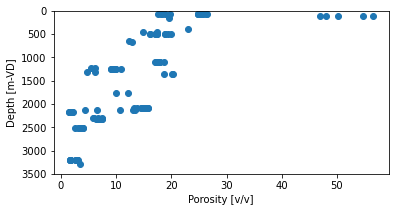

In [38]:
# assign Pandas dataframe columns
x = tvz.EffectivePorosity_VolPercent
y = tvz.SampleDepth_mMD
z = tvz.Vp_mps

fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.scatter(
    x,
    y,
    # what do you think goes here to colour data by x?
)

# plot the colour bar
# cbar = fig.colorbar(cax) # will not work until we adjust the code above

# scatter plot kwargs
# s=0.5 # size, float
# c='k' # named colour, hex code, or numeric values (see advanced notebook)
# cmap='colour-map-name', append _r to the name to reverse the colour map

# Perceptually uniform colour maps
# these are reccomended
# viridis
# plasma
# inferno
# magma
# cividis

# Sequential colourmaps
# Greys
# Blues
# GnBu
# OrRd

# Other colour maps
# these are not reccomended
# hsv
# gist_rainbow
# rainbow

# colour bar kwargs
# shrink=0.5 # make the bar shorter
# fraction=0.15 # amount of axis that the bar will occupy
# aspect=10 # make the bar fatter using smaller numbers

ax.set_ylim(3500,0)
ax.set_ylabel('Depth [m-VD]')
ax.set_xlabel('Porosity [v/v]')


---
## Colour Scales: The Puzzling and the Perceptually Uniform

There is a dizzying array of colour scales to choose from and it's easy to get carried away. We must choose wisely or we risk distorting how our data are perceived. 

Refer to [this paper](https://www.nature.com/articles/s41467-020-19160-7) to get a feel for how data are distorted by colour. 

Explore how perception is distorted by colour scale selecting using [this application](https://github.com/mycarta/Colormap-distorsions-Panel-app#how-to-use-the-app) (Hint: click on 'launch app' and wait for binder to load).  

Matplotlib provides [a useful resource](https://matplotlib.org/stable/tutorials/colors/colormaps.html) that helps with colour scale selection. 

**Rule of thumb: Avoid rainbow and prefer perceptually uniform.**

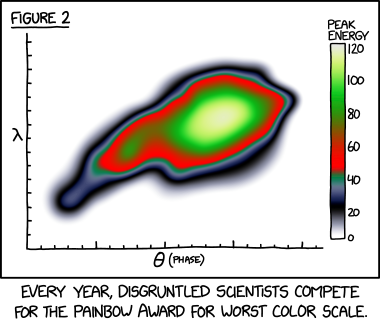

In [2]:
from IPython import display
display.Image("https://imgs.xkcd.com/comics/painbow_award.png")

---
## Advanced Scatter Plots with Seaborn

Seaborn is a powerful plotting tool that works well with Pandas.

It's ideal for generating static plots for reports, presentations and publication. 

[Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)

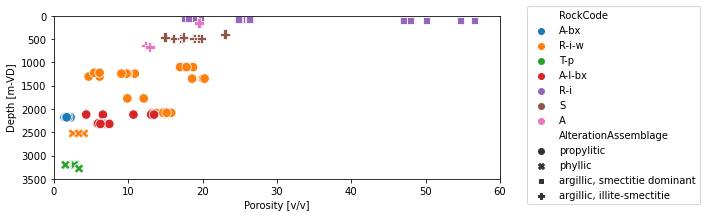

In [50]:
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize=(8,3))

sns.scatterplot(
    x='EffectivePorosity_VolPercent', # Pandas column name for x data
    y='SampleDepth_mMD', # Pandas column name for y data
    data=tvz, # Pandas dataframe name
    ax=ax, # name of the axis that the seaborn plot goes in
    s=90, # marker size
    hue='RockCode', # marker colour
    style='AlterationAssemblage', # marker style
)

ax.set_xlim(0,60)
ax.set_ylim(3500,0)

ax.set_xlabel('Porosity [v/v]')
ax.set_ylabel('Depth [m-VD]')

# Place legend right of the axis
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.45), 
    ncol=1,
);


---
## Plot Element Layering

Sometimes you want to place one set of data on top of another in a plot, or all of the data on top of the grid. We use zorder to do this. There is some issue with zorder and grids, so a bit of trial and error is typically required.

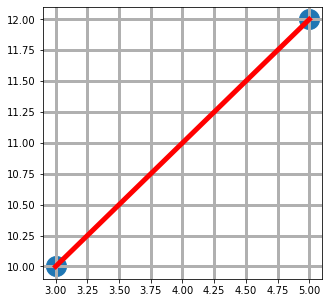

In [72]:
# one plot (axis) in one figure

x = [3,5]
y = [10,12]

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(x,y,linewidth=5,color='r')
ax.scatter(x,y,marker='o',s=400)
ax.grid(linewidth=3)

---
## Highlights and Fills

Example code for three methods that can be used to highlight data on a plot:
- Fill between lines in either the [x direction](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_betweenx.html#matplotlib.pyplot.fill_betweenx) or [y direction](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html)
- Add [horizontal](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hlines.html?highlight=hlines#matplotlib.axes.Axes.hlines) or [vertical](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html) lines
- Shade a zone on the plot that spans either the [x axis]() or [y axis](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html) direction

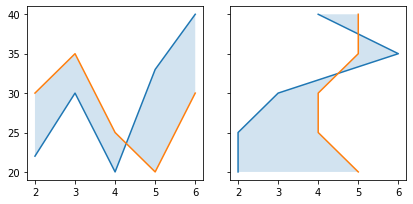

In [107]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(6,3), sharey=True)
plt.tight_layout()

# fill between lines in the y axis direction

x = [2, 3, 4, 5, 6]
y1 = [22, 30, 20,  33, 40]
y2 = [30, 35, 25, 20, 30]

ax0.plot(x, y1)
ax0.plot(x, y2)
ax0.fill_between(x, y1, y2, alpha=0.2)

# Fill between lines in the x axis direction

y = [20, 25, 30, 35, 40]
x1 = [2, 2, 3, 6, 4]
x2 = [5, 4, 4, 5, 5]

ax1.plot(x1, y)
ax1.plot(x2, y)
ax1.fill_betweenx(y, x1, x2, alpha=0.2)


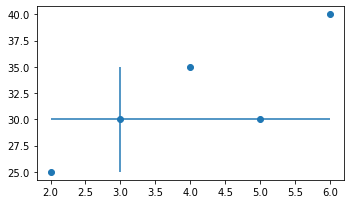

In [132]:
fig, ax = plt.subplots(1,1,figsize=(5,3))
plt.tight_layout()

x = [2, 3, 4, 5, 6]
y = [25, 30, 35, 30, 40]

ax.scatter(x, y)

# add a horizontal line
ax.hlines(
    30, # y axis location
    2,  # start of line on x axis
    6,   # end of line on x axis
)

# add a vertical line
ax.vlines(
    3,  # x axis location
    25, # start of line on y axis
    35,  # end of line on y axis
);

# kwargs to try
# color = '' # named colour or hex value
# linewidth = 0.5 # float
# linestyle = '' # '-'  '--'  '-.'  ':'

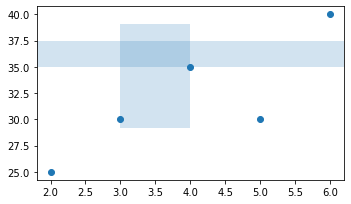

In [133]:
fig, ax = plt.subplots(1,1,figsize=(5,3))
plt.tight_layout()

x = [2, 3, 4, 5, 6]
y = [25, 30, 35, 30, 40]

ax.scatter(x, y)

# span x axis
ax.axvspan(
    3, # min on x axis
    4, # max on x axis
    ymin=0.3, # bottom of box, propotion from 0-1
    ymax=0.9,  # top of box, propotion from 0-1
    alpha=0.2,
)

# span y axis
ax.axhspan(
    35,
    37.5,
    alpha=0.2,
    # add kwarg xmin and xmax
);

# other kwargs to try
# color = '' # named colour or hex value
# hatch = '' # '/'  '\'  '|'  '-'  '+'  'x'  'o'  'O'  '.'  '*'
# edgecolor = '' # named colour or hex value
# facecolor = '' # named colour or hex value

---
## Where to From Here

Illustrator or other graphics package for finishing 